In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

def load_data(filename):
    """
    Funzione per il parsing di una serie intraday 
    con estensione txt esportata da Tradestation
    """
    data = pd.read_csv(filename, 
                       usecols=['Date','Time','Open','High','Low','Close','Up','Down'], 
                       parse_dates=[['Date', 'Time']], )
    data.columns = ["date_time","open","high","low","close","up","down"]
    data.set_index('date_time', inplace = True)
    data['volume'] = data['up'] + data['down']
    data.drop(['up','down'], axis=1, inplace=True)
    return data

startDate = "20070101"
endDate = "20190914"
filename = "@GC_60min_Exchange.txt"
dataset = load_data(filename)
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))
dataset = dataset.loc[startDateParsed:endDateParsed]
dataset["hour"] = dataset.index.hour
dataset['DOM'] = dataset.index.day
dataset['DOW'] = dataset.index.dayofweek
dataset['Week'] = dataset.index.week
dataset['Month'] = dataset.index.month
dataset['DeltaClosePerc'] = round((dataset.close - dataset.close.shift(1)) / dataset.close.shift(1) * 100,2)
dataset['CloseOpenPerc'] = round((dataset.close - dataset.open) / dataset.open * 100,2)
dataset.tail(23)

,open,high,low,close,volume,hour,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc
date_time,,,,,,,,,,,,
2019-09-12 19:00:00,1506.5,1507.2,1502.9,1504.6,3620,19,12,3,37,9,-0.15,-0.13
2019-09-12 20:00:00,1504.5,1506.0,1503.4,1505.4,2976,20,12,3,37,9,0.05,0.06
2019-09-12 21:00:00,1505.4,1508.6,1504.3,1506.1,8114,21,12,3,37,9,0.05,0.05
2019-09-12 22:00:00,1506.1,1506.4,1503.1,1504.4,5637,22,12,3,37,9,-0.11,-0.11
2019-09-12 23:00:00,1504.4,1505.6,1503.6,1504.2,3244,23,12,3,37,9,-0.01,-0.01
2019-09-13 00:00:00,1504.2,1505.3,1503.8,1505.1,2122,0,13,4,37,9,0.06,0.06
2019-09-13 01:00:00,1505.1,1506.4,1505.0,1505.4,2267,1,13,4,37,9,0.02,0.02
2019-09-13 02:00:00,1505.4,1505.5,1504.2,1505.1,2362,2,13,4,37,9,-0.02,-0.02
2019-09-13 03:00:00,1505.0,1513.5,1504.9,1512.5,14072,3,13,4,37,9,0.49,0.50


In [2]:
dataset[-23:].iplot(kind='candle',theme='white',
                        up_color='green', down_color='red',
                        title = "Gold Continuous Futures [GC]", xTitle = "Tempo", yTitle = "Prezzo")

In [3]:
monthly = dataset.iloc[:,6:].resample('M').mean()
monthly['MonthlyCloseOpenPerc'] = dataset.resample('M')['CloseOpenPerc'].sum()
monthly['MonthlyDeltaClosePerc'] = dataset.resample('M')['DeltaClosePerc'].sum()
monthly.head(10)

,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc,MonthlyCloseOpenPerc,MonthlyDeltaClosePerc
date_time,,,,,,,,
2007-01-31,16.225933,2.009823,2.888016,1.0,0.003248,0.003183,1.62,1.65
2007-02-28,14.786957,2.086957,7.100000,2.0,0.004022,0.002457,1.13,1.85
2007-03-31,15.986028,2.197605,11.255489,3.0,-0.002695,-0.003074,-1.54,-1.35
2007-04-30,15.638710,1.941935,15.670968,4.0,0.003118,0.002086,0.97,1.45
2007-05-31,16.053030,2.079545,19.996212,5.0,-0.003996,-0.002481,-1.31,-2.11
2007-06-30,15.707113,2.158996,24.364017,6.0,-0.004121,-0.003766,-1.80,-1.97
2007-07-31,15.886497,1.982387,28.700587,7.0,0.002642,0.000724,0.37,1.35
2007-08-31,16.284351,2.188931,33.156489,8.0,0.001355,0.003130,1.64,0.71
2007-09-30,15.440860,2.129032,37.473118,9.0,0.016624,0.016968,7.89,7.73


In [10]:
monthly['MonthlyCloseOpenPerc'].describe(percentiles = [0.01,0.05,0.10,0.20,0.30,0.40,0.50,
                                                        0.60,0.70,0.80,0.90,0.95,0.99])

count    153.000000
mean       0.252222
std        4.552386
min      -15.790000
1%       -10.282400
5%        -6.960000
10%       -5.456000
20%       -3.092000
30%       -1.836000
40%       -1.082000
50%        0.100000
60%        1.150000
70%        2.560000
80%        4.132000
90%        6.098000
95%        7.662000
99%        9.982800
max       10.690000
Name: MonthlyCloseOpenPerc, dtype: float64

In [11]:
monthly['MonthlyDeltaClosePerc'].describe(percentiles = [0.01,0.05,0.10,0.20,0.30,0.40,0.50,
                                                         0.60,0.70,0.80,0.90,0.95,0.99])

count    153.000000
mean       0.465817
std        4.588890
min      -15.460000
1%       -10.416800
5%        -6.414000
10%       -5.276000
20%       -2.888000
30%       -1.774000
40%       -0.960000
50%        0.370000
60%        1.426000
70%        2.648000
80%        4.456000
90%        6.068000
95%        8.186000
99%       10.194800
max       11.800000
Name: MonthlyDeltaClosePerc, dtype: float64

In [6]:
months = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
          "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

biasMonthlyIntraday = []
biasMonthlyOverNight = []

for mkey, mvalue in months.items():
    biasMonthlyIntraday.append(monthly[(monthly['Month'] == mvalue)]['MonthlyCloseOpenPerc'].mean())
    biasMonthlyOverNight.append(monthly[(monthly['Month'] == mvalue)]['MonthlyDeltaClosePerc'].mean())

print("")
print("Intraday:")
print(len(biasMonthlyIntraday))
print(biasMonthlyIntraday)
print("")
print("OverNight:")
print(len(biasMonthlyOverNight))
print(biasMonthlyOverNight)


Intraday:
12
[3.0161538461538457, 1.3992307692307724, -1.4961538461538457, -0.11846153846153795, -0.913846153846153, 0.05615384615384462, 0.12923076923076948, 1.8607692307692312, -0.2807692307692316, -0.37333333333333313, -0.06416666666666639, -0.3033333333333347]

OverNight:
12
[3.240769230769231, 1.549230769230772, -1.1592307692307675, 0.2461538461538475, -0.7699999999999994, 0.1446153846153833, 0.32615384615384685, 2.237692307692309, -0.18461538461538485, -0.19833333333333295, 0.12000000000000151, -0.08250000000000009]


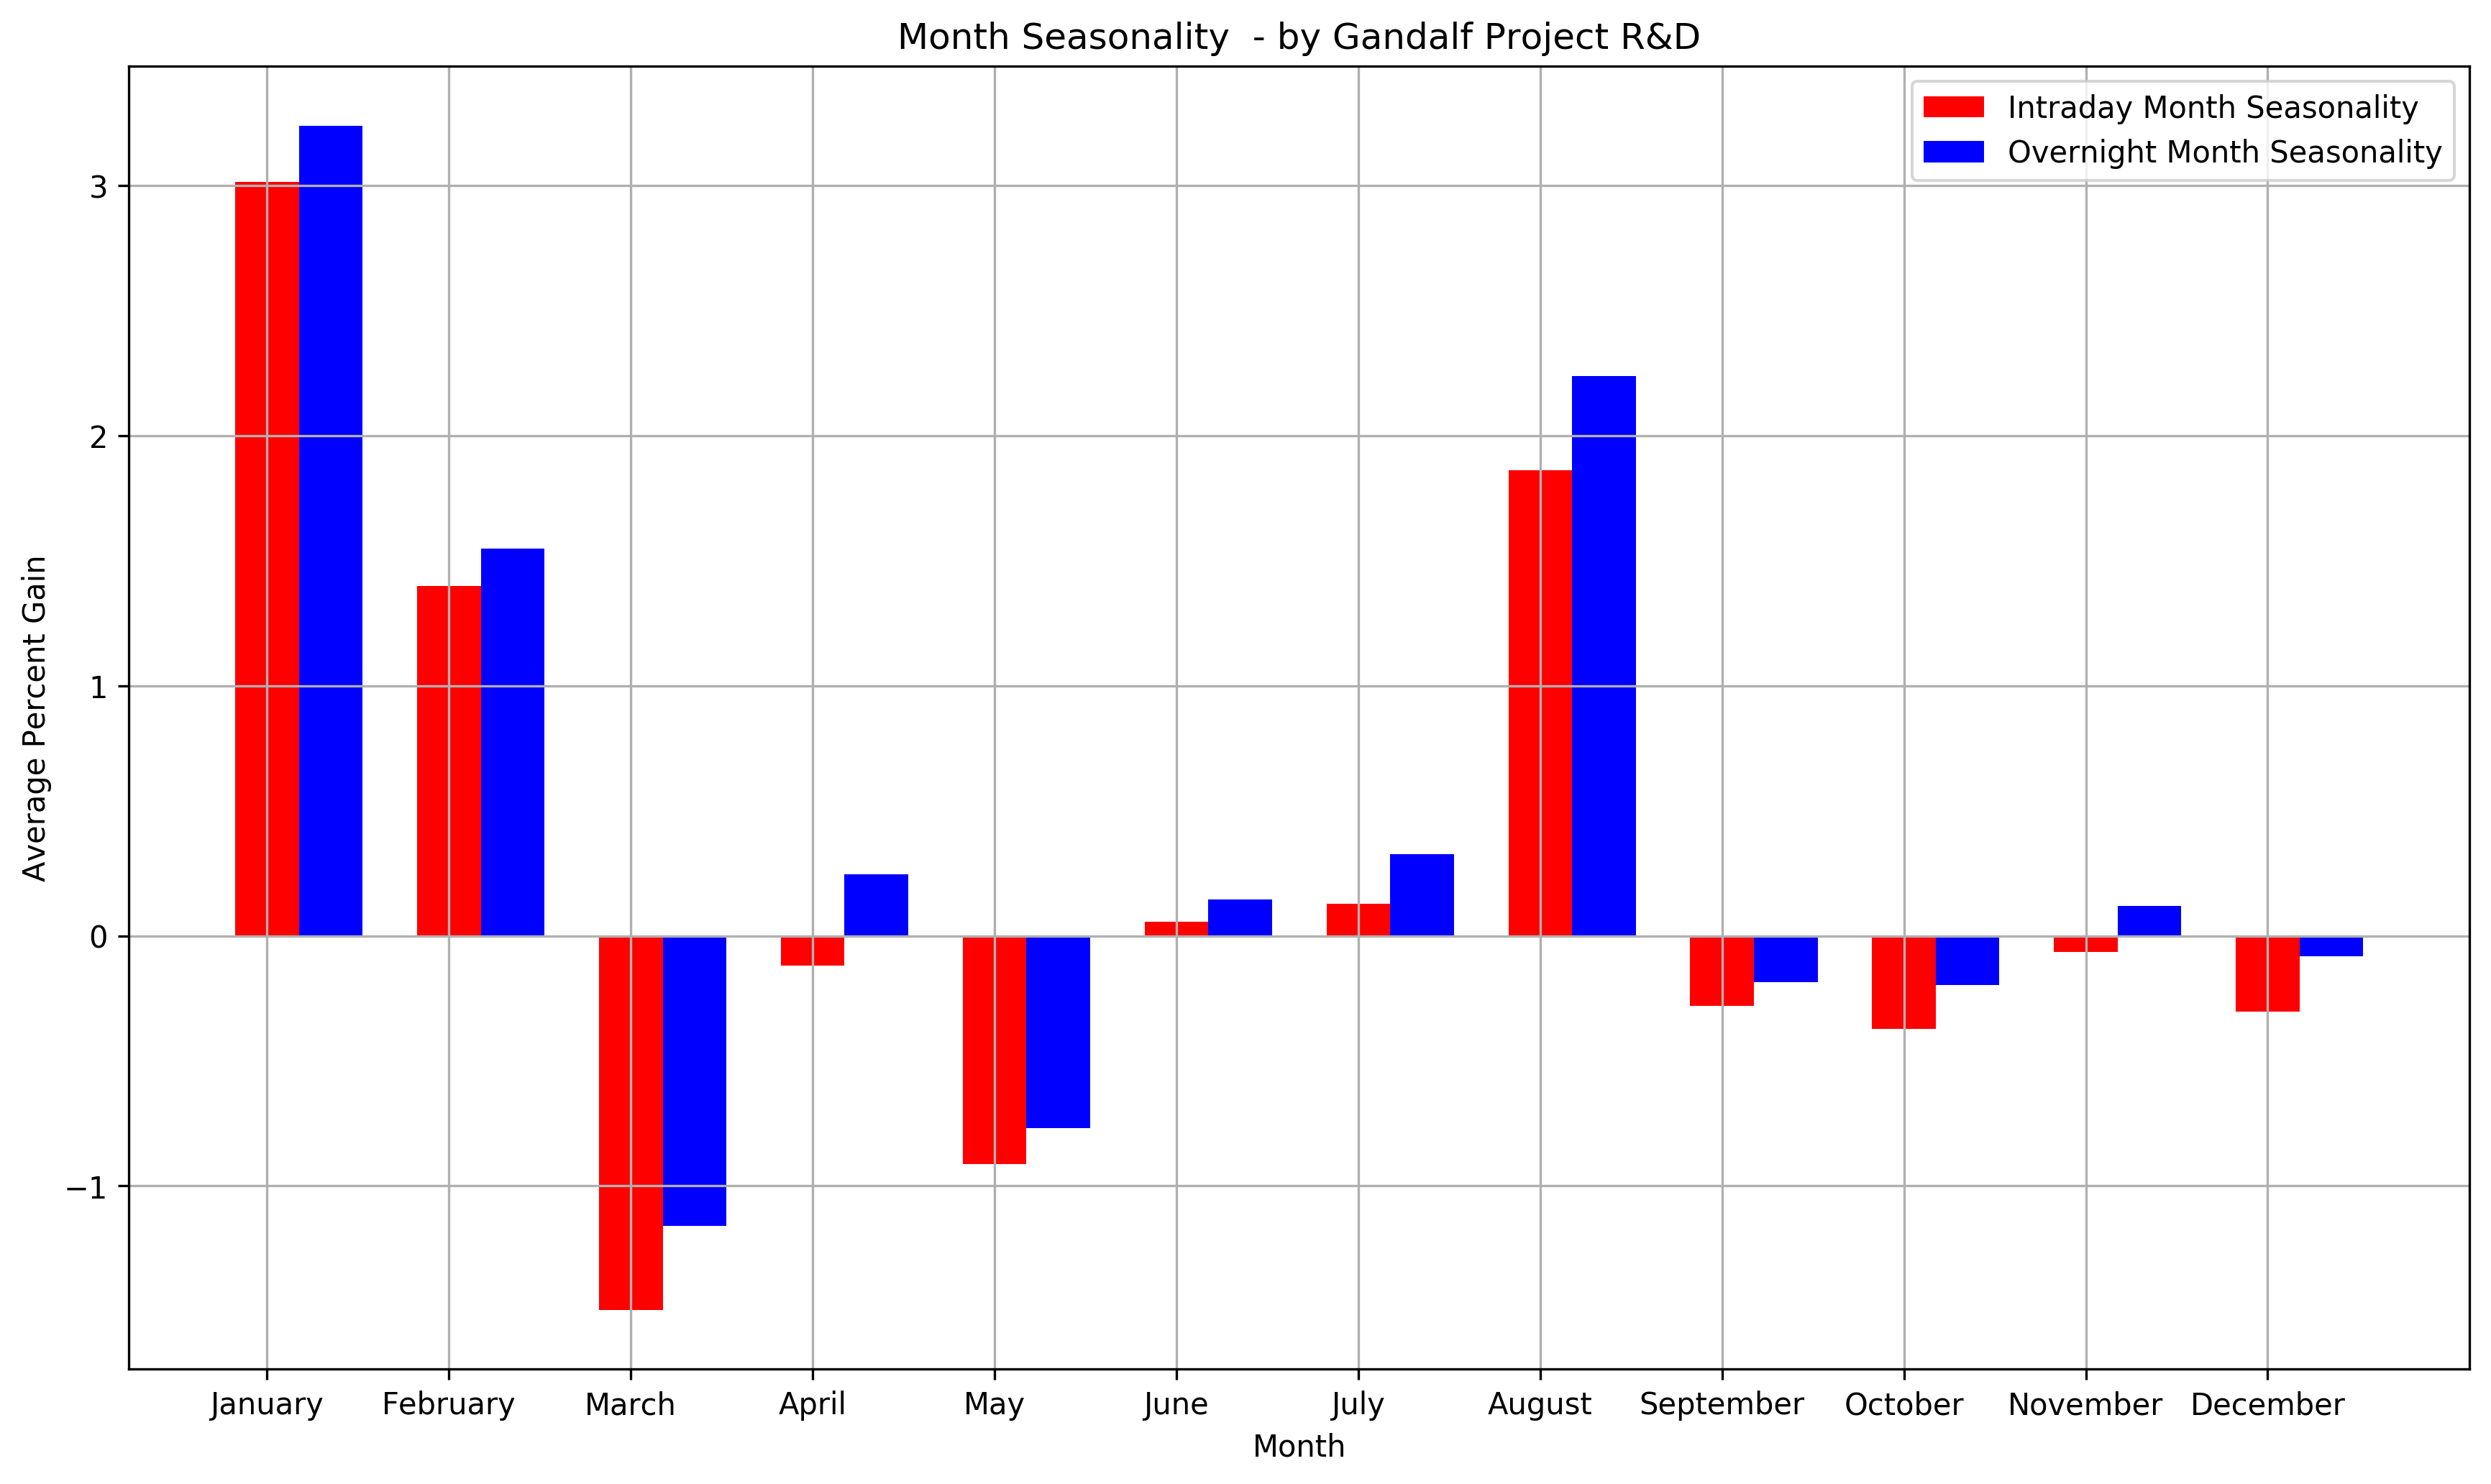

In [7]:
n_groups = 12
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                biasMonthlyIntraday, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Month Seasonality')

rects1 = ax.bar(index + bar_width, 
                biasMonthlyOverNight, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Overnight Month Seasonality')

ax.set_xlabel('Month')
ax.set_ylabel('Average Percent Gain')
ax.set_title('Month Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((["January",
                     "February",
                     "March",
                     "April",
                     "May",
                     "June",
                     "July",
                     "August",
                     "September",
                     "October",
                     "November",
                     "December"]))
ax.legend()
ax.grid(True)
plt.show()

# Percentuale occorrenze positive e negative

In [8]:
def percPosNeg(array, soglia):
    """
    Funzione che restituisce le percentuali di valori 
    maggiori e minori di una soglia
    """
    if len(array) == 0:
        return 0,0
    contapos = 0
    contaneg = 0
    for el in array:
        if el > soglia:
            contapos+=1
        if el <= soglia:
            contaneg+=1
    return round(contapos/len(array)*100,2), round(contaneg/len(array)*100,2)

In [18]:
months = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
          "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

Month_Intraday_Statistics = []
Month_OverNight_Statistics = []

months_names = list(months.keys())

for mkey, mvalue in months.items():
    
    intraday = monthly[(monthly['Month'] == mvalue)]['MonthlyCloseOpenPerc'].dropna()
    Month_Intraday_Statistics.append(percPosNeg(intraday,0))
    
    overnight = monthly[(monthly['Month'] == mvalue)]['MonthlyDeltaClosePerc'].dropna()
    Month_OverNight_Statistics.append(percPosNeg(overnight,0))

print("Statistics Intraday:")
for el in range(len(Month_Intraday_Statistics)):
    if biasMonthlyIntraday[el] > 0:
        print(months_names[el], round(biasMonthlyIntraday[el],4), Month_Intraday_Statistics[el][0], "%")
    if biasMonthlyIntraday[el] <= 0:
        print(months_names[el], round(biasMonthlyIntraday[el],4), Month_Intraday_Statistics[el][1], "%")
        
print("")
print("Statistics Overnight:")
for el in range(len(Month_OverNight_Statistics)):
    if biasMonthlyOverNight[el] > 0:
        print(months_names[el], round(biasMonthlyOverNight[el],4), Month_OverNight_Statistics[el][0], "%")
    if biasMonthlyOverNight[el] <= 0:
        print(months_names[el], round(biasMonthlyOverNight[el],4), Month_OverNight_Statistics[el][1], "%")

Statistics Intraday:
January 3.0162 76.92 %
February 1.3992 61.54 %
March -1.4962 76.92 %
April -0.1185 53.85 %
May -0.9138 61.54 %
June 0.0562 46.15 %
July 0.1292 61.54 %
August 1.8608 69.23 %
September -0.2808 53.85 %
October -0.3733 50.0 %
November -0.0642 66.67 %
December -0.3033 50.0 %

Statistics Overnight:
January 3.2408 76.92 %
February 1.5492 61.54 %
March -1.1592 69.23 %
April 0.2462 46.15 %
May -0.77 53.85 %
June 0.1446 46.15 %
July 0.3262 61.54 %
August 2.2377 69.23 %
September -0.1846 53.85 %
October -0.1983 50.0 %
November 0.12 50.0 %
December -0.0825 50.0 %


In [17]:
monthly[(monthly['Month'] == 1)]

,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc,MonthlyCloseOpenPerc,MonthlyDeltaClosePerc
date_time,,,,,,,,
2007-01-31,16.225933,2.009823,2.888016,1.0,0.003248,0.003183,1.62,1.65
2008-01-31,16.543478,2.114625,3.061265,1.0,0.016700,0.014763,7.47,8.45
2009-01-31,16.544513,2.167702,3.339545,1.0,0.009234,0.007785,3.76,4.46
2010-01-31,16.430736,2.142857,3.043290,1.0,-0.003680,-0.004740,-2.19,-1.70
2011-01-31,16.169072,2.041237,3.125773,1.0,-0.011113,-0.011794,-5.72,-5.39
2012-01-31,16.771008,2.006303,2.823529,1.0,0.020399,0.020168,9.60,9.71
2013-01-31,16.580709,2.125984,3.064961,1.0,-0.001673,-0.000748,-0.38,-0.85
2014-01-31,16.809145,2.208748,3.228628,1.0,0.006123,0.006938,3.49,3.08
2015-01-31,16.524008,2.185804,3.334029,1.0,0.016013,0.015678,7.51,7.67


In [58]:
a = monthly[(monthly["Month"] < 3)]

a.MonthlyCloseOpenPerc.iplot(kind='scatter', mode = "markers", color = "blue", theme='white', showlegend = True,
                             title = "Monthly Intraday Movements", xTitle = "Price", yTitle = "Occurrencies")